# 03. PyTorch 计算机视觉

[计算机视觉](https://en.wikipedia.org/wiki/Computer_vision) 是教计算机“看”的艺术。

例如，它可以涉及构建一个模型来分类一张照片是猫还是狗（[二分类](https://developers.google.com/machine-learning/glossary#binary-classification)）。

或者分类一张照片是猫、狗还是鸡（[多分类](https://developers.google.com/machine-learning/glossary#multi-class-classification)）。

或者识别视频帧中汽车的位置（[目标检测](https://en.wikipedia.org/wiki/Object_detection)）。

或者找出图像中不同物体可以分离的地方（[全景分割](https://arxiv.org/abs/1801.00868)）。

![计算机视觉问题示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*二分类、多分类、目标检测和分割的计算机视觉问题示例。*

## 计算机视觉应用在哪些地方？

如果你使用智能手机，你已经在使用计算机视觉了。

相机和照片应用使用[计算机视觉来增强](https://machinelearning.apple.com/research/panoptic-segmentation)和排序图像。

现代汽车使用[计算机视觉](https://youtu.be/j0z4FweCy4M?t=2989)来避免与其他汽车碰撞，并保持在车道线内行驶。

制造商使用计算机视觉来识别各种产品中的缺陷。

监控摄像头使用计算机视觉来检测潜在的入侵者。

本质上，任何可以用视觉方式描述的事物都可能成为计算机视觉问题。

## 我们将要覆盖的内容

我们将把过去几节课中学习的 PyTorch 工作流程应用到计算机视觉中。

![计算机视觉相关的 PyTorch 工作流程](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

具体来说，我们将覆盖以下内容：

| **主题** | **内容** |
| ----- | ----- |
| **0. PyTorch 中的计算机视觉库** | PyTorch 提供了一些内建的计算机视觉库，来让我们更轻松地进行计算机视觉任务，来一起看看吧。 |
| **1. 加载数据** | 为了进行计算机视觉的练习，我们将从 [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) 中加载一些不同服装的图像。 |
| **2. 准备数据** | 我们有一些图像了，接下来使用 [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) 将它们加载进来，以便在训练循环中使用。 |
| **3. 模型 0: 构建基准模型** | 在这里，我们将创建一个多类别分类模型来学习数据中的模式，同时选择一个 **损失函数**、**优化器**，并构建 **训练循环**。 |
| **4. 做预测并评估模型 0** | 使用我们的基准模型进行预测并评估其表现。 |
| **5. 设置设备无关的代码** | 写设备无关的代码是最佳实践，因此我们将进行设置。 |
| **6. 模型 1: 添加非线性** | 实验是机器学习中的一个重要部分，我们将尝试通过添加非线性层来改进我们的基准模型。 |
| **7. 模型 2: 卷积神经网络 (CNN)** | 是时候深入计算机视觉领域，引入强大的卷积神经网络架构了。 |
| **8. 比较我们的模型** | 我们构建了三个不同的模型，接下来让我们来比较它们。 |
| **9. 评估我们最好的模型** | 使用随机图像进行预测并评估我们最好的模型。 |
| **10. 创建混淆矩阵** | 混淆矩阵是评估分类模型的好方法，让我们看看如何生成一个混淆矩阵。 |
| **11. 保存和加载表现最好的模型** | 由于我们可能希望稍后使用我们的模型，因此我们将保存它并确保它能够正确加载。 |

## 0. PyTorch 中的计算机视觉库

在我们开始编写代码之前，让我们先了解一些你应该知道的 PyTorch 计算机视觉库。

| PyTorch 模块 | 功能 |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | 包含常用于计算机视觉问题的数据集、模型架构和图像转换功能。 |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | 在这里你可以找到许多示例计算机视觉数据集，涵盖图像分类、物体检测、图像标注、视频分类等问题。它还包含了[用于制作自定义数据集的基础类](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets)。 |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | 该模块包含了许多在 PyTorch 中实现的高效且常用的计算机视觉模型架构，你可以将它们用于自己的问题。 |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | 图像通常需要在与模型一起使用之前进行转换（转换为数字、处理、增强等），常见的图像转换功能可以在此找到。 |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | PyTorch 的基础数据集类。 |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | 创建一个 Python 可迭代对象，遍历一个数据集（使用 `torch.utils.data.Dataset` 创建）。 |

> **注意：** `torch.utils.data.Dataset` 和 `torch.utils.data.DataLoader` 类不仅限于计算机视觉，在 PyTorch 中，它们可以处理多种不同类型的数据。

现在我们已经介绍了一些最重要的 PyTorch 计算机视觉库，接下来让我们导入相关的依赖项。

In [2]:
# 导入 PyTorch
import torch
from torch import nn

# 导入 torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# 导入 matplotlib 用于可视化
import matplotlib.pyplot as plt

# 检查版本
# 注意：你的 PyTorch 版本不应低于 1.10.0，torchvision 版本不应低于 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.5.1
torchvision version: 0.20.1


## 1. 获取数据集

为了开始处理计算机视觉问题，我们需要获取一个计算机视觉数据集。

我们将从 **FashionMNIST** 开始。

**MNIST** 代表“修改版国家标准与技术研究院数据集”。

[原始 MNIST 数据集](https://en.wikipedia.org/wiki/MNIST_database)包含了成千上万的手写数字样本（从 0 到 9），该数据集曾用于构建计算机视觉模型，用于邮政服务的数字识别。

**FashionMNIST**（由 Zalando Research 创建）是一个类似的设置。

不同之处在于，它包含了 10 种不同类型衣物的灰度图像。

![FashionMNIST 示例图片](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` 包含了很多示例数据集，你可以用来练习编写计算机视觉代码。FashionMNIST 就是其中之一。由于它包含 10 个不同的图像类别（不同类型的衣物），因此它是一个多类别分类问题。*

稍后，我们将构建一个计算机视觉神经网络，用于识别这些图像中的不同款式的衣物。

PyTorch 提供了很多常见的计算机视觉数据集，这些数据集存储在 `torchvision.datasets` 中。

其中包括 FashionMNIST，可以通过 [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) 获取。

要下载数据集，我们提供以下参数：
* `root: str` - 你希望将数据下载到哪个文件夹？
* `train: Bool` - 你想要训练集还是测试集？
* `download: Bool` - 是否需要下载数据？
* `transform: torchvision.transforms` - 你希望对数据进行哪些转换？
* `target_transform` - 如果需要，你也可以对标签（目标）进行转换。

`torchvision` 中的许多其他数据集也支持这些参数选项。

In [3]:
# 设置训练数据
train_data = datasets.FashionMNIST(
    root="data", # 数据下载保存的位置
    train=True, # 获取训练数据
    download=True, # 如果数据不存在，则下载数据
    transform=ToTensor(), # 图片是以 PIL 格式存储的，我们将其转换为 Torch 张量
    target_transform=None # 你也可以转换标签（如果需要）
)

# 设置测试数据
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # 获取测试数据
    download=True,
    transform=ToTensor() # 将图片转换为张量
)

Let's check out the first sample of the training data.

In [4]:
# 查看第一个训练样本
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 计算机视觉模型的输入和输出形状

我们有一个大的张量（图像），它对应一个目标的单一值（标签）。

让我们来看一下图像的形状。

In [5]:
# 图像的形状是什么？
image.shape

torch.Size([1, 28, 28])

图像张量的形状是 `[1, 28, 28]`，或者更具体地说：

```
[color_channels=1, height=28, width=28]
```

`color_channels=1` 表示图像是灰度图像。

![fashionMNIST问题的输入和输出形状示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*不同的问题会有不同的输入和输出形状，但前提是：将数据编码为数字，构建模型来发现这些数字中的模式，然后将这些模式转换为有意义的东西。*

如果 `color_channels=3`，则图像包含红、绿、蓝三种颜色通道的像素值（这也被称为 [RGB 颜色模型](https://en.wikipedia.org/wiki/RGB_color_model)）。

当前张量的顺序通常被称为 `CHW`（颜色通道，高度，宽度）。

关于图像是否应表示为 `CHW`（颜色通道在前）或 `HWC`（颜色通道在后）有争议。

> **注意：**你还会看到 `NCHW` 和 `NHWC` 格式，其中 `N` 表示*图像的数量*。例如，如果你的 `batch_size=32`，则张量的形状可能是 `[32, 1, 28, 28]`。稍后我们将讨论批量大小。

PyTorch 通常接受 `NCHW`（通道优先）作为许多操作的默认格式。

然而，PyTorch 也解释说 `NHWC`（通道最后）性能更好，并被认为是 [最佳实践](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice)。

目前，由于我们的数据集和模型相对较小，这个差异不会太大。

但请记住，当你处理更大的图像数据集并使用卷积神经网络时（稍后会介绍），这个问题会更为重要。

现在，让我们查看更多数据的形状。

In [6]:
# 一共有多少样本？
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

我们有 60,000 个训练样本和 10,000 个测试样本。

有哪些类别呢？

我们可以通过 `.classes` 属性找到这些类别。

In [7]:
# 查看类别
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

太棒了！看起来我们正在处理10种不同的衣物。

由于我们有10个不同的类别，这意味着我们的问题是**多类分类**。

接下来，让我们进行可视化。

### 1.2 可视化我们的数据

Image shape: torch.Size([1, 28, 28])


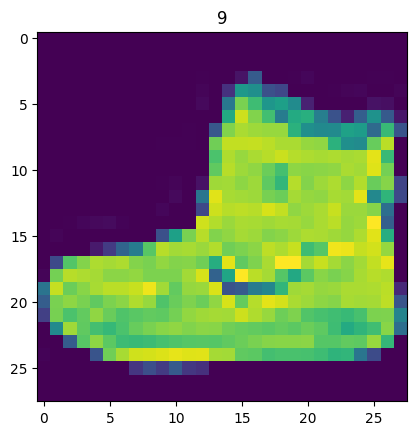

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # 图像的形状是 [1, 28, 28]（颜色通道，高度，宽度）
plt.title(label);

我们可以使用 `plt.imshow()` 的 `cmap` 参数将图像转换为灰度图。

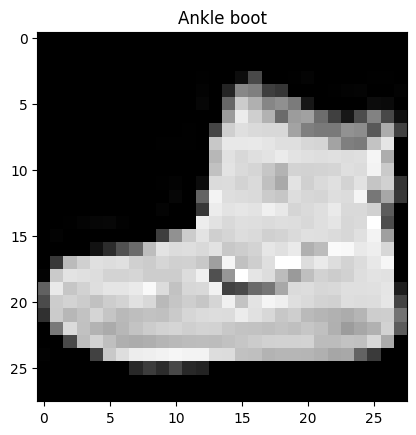

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

很漂亮，尽管这只是一个像素化的灰度图踝靴，已经算是相当不错了。

让我们再看看几个图像。

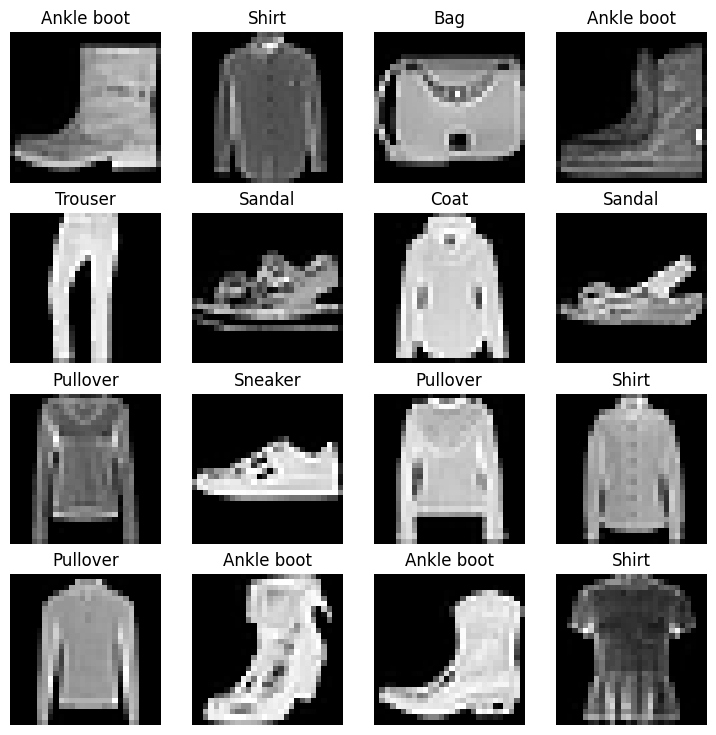

In [10]:
# 画出更多的图
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

嗯，这个数据集看起来不太美观。

但我们将在这个数据集上学习到的构建模型的原则，实际上适用于各种计算机视觉问题。

本质上，就是通过将像素值输入模型，并找到其中的模式，然后使用这些模式来处理未来的像素值。

此外，即使是这个小数据集（是的，60,000张图片在深度学习中也算小），你能编写一个程序来分类每一张图片吗？

你可能能做到。

不过，我认为在 PyTorch 中编写一个模型会更快。

> **问题：** 你认为以上数据仅用直线（线性模型）就能建模吗？还是你认为也需要非直线（非线性模型）呢？

## 2. 准备 DataLoader

现在我们已经有了一个准备好的数据集。

下一步是使用 [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) 或简称 `DataLoader` 来准备数据。

`DataLoader` 做的事情正如你所想的那样。

它帮助将数据加载到模型中。

无论是训练还是推理。

它将一个大型的 `Dataset` 转换成一个较小的数据块的 Python 可迭代对象。

这些较小的块被称为 **批次** 或 **小批次**，批次大小可以通过 `batch_size` 参数设置。

为什么要这么做？

因为这样做在计算上更高效。

在理想的世界中，你可以一次性对所有数据进行前向和反向传播。

但一旦你开始使用非常大的数据集，除非你有无限的计算能力，否则将数据分成小批次会更容易。

它还给你的模型提供了更多改进的机会。

使用 **小批次**（数据的较小部分）时，每个 epoch 进行多次梯度下降（每个小批次一次，而不是每个 epoch 一次）。

什么是一个合适的批次大小？

对于许多问题，[32 是一个不错的起点](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw)。

但由于这是一个可以设置的 **超参数**，你可以尝试不同的值，通常使用的值是 2 的幂（例如 32、64、128、256、512）。

![批次化 FashionMNIST，批次大小为 32，且启用了打乱。类似的批次化过程也适用于其他数据集，但会根据批次大小有所不同。](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)

让我们为训练集和测试集创建 `DataLoader`。

In [11]:
from torch.utils.data import DataLoader

# 设置批次大小超参数
BATCH_SIZE = 32

# 将数据集转换为可迭代对象（批次）
train_dataloader = DataLoader(train_data,  # 要转换为可迭代对象的数据集
    batch_size=BATCH_SIZE,  # 每个批次有多少样本？
    shuffle=True  # 是否在每个 epoch 后打乱数据？
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False  # 测试数据不需要打乱
)

# 查看我们创建的内容
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x14ddb57c0>, <torch.utils.data.dataloader.DataLoader object at 0x14d883da0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
# 查看训练数据加载器中的内容
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

我们可以通过检查单个样本，看到数据没有改变。

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


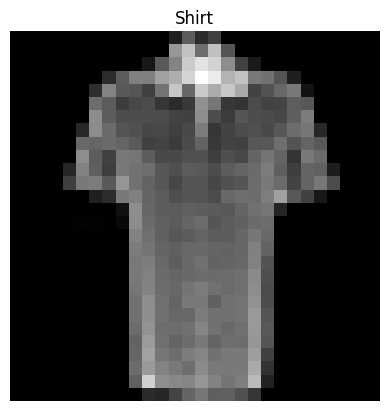

In [13]:
# 展示一个样本
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. 模型 0：构建基线模型

数据已经加载并准备好了！

接下来，我们将通过子类化 `nn.Module` 来构建一个 **基线模型**。

**基线模型** 是最简单的模型之一。

你将基线模型作为起点，并尝试通过后续更复杂的模型进行改进。

我们的基线模型将包含两个 [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) 层。

我们在之前的章节中做过类似的操作，但这次会有一个小差异。

因为我们正在处理图像数据，所以我们将使用不同的层来开始。

那就是 [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) 层。

`nn.Flatten()` 会将一个张量的多个维度压缩成一个单一的向量。

看到具体代码后，你会更容易理解这个概念。

In [14]:
# 创建一个 flatten 层
flatten_model = nn.Flatten()  # 所有 nn 模块都可以作为模型使用（可以进行前向传递）

# 获取一个样本
x = train_features_batch[0]

# 对样本进行展平
output = flatten_model(x)  # 执行前向传递

# 打印发生了什么
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# 尝试取消下面的注释并查看会发生什么
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


`nn.Flatten()` 层将我们的形状从 `[色彩通道, 高度, 宽度]` 转换为 `[色彩通道, 高度*宽度]`。

为什么要这样做？

因为我们现在将像素数据从高度和宽度的维度转换为一个长的 **特征向量**。

而 `nn.Linear()` 层喜欢其输入以特征向量的形式出现。

接下来，我们将创建我们的第一个模型，使用 `nn.Flatten()` 作为第一层。

In [15]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # 神经网络喜欢其输入为向量形式
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # in_features = 数据样本中的特征数 (784个像素)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

我们已经有了一个基线模型类，现在让我们实例化一个模型。

我们需要设置以下参数：
* `input_shape=784` - 这是输入到模型中的特征数量，在我们的案例中，这就是目标图像的每个像素（28像素高 × 28像素宽 = 784个特征）。
* `hidden_units=10` - 隐藏层中的单元数/神经元数，这个数字可以是任何你想要的，但为了保持模型简单，我们从 `10` 开始。
* `output_shape=len(class_names)` - 由于我们正在处理一个多类别分类问题，我们需要为数据集中每个类别创建一个输出神经元。

让我们创建模型的一个实例，并将其发送到CPU上运行（我们稍后将进行一次小的测试，比较在CPU和GPU上运行 `model_0` 和类似模型的表现）。

In [16]:
torch.manual_seed(42)  # 设置随机种子，确保结果可复现

# 需要使用输入参数设置模型
model_0 = FashionMNISTModelV0(
    input_shape=784,  # 每个像素一个特征（28x28）
    hidden_units=10,  # 隐藏层中的单元数
    output_shape=len(class_names)  # 每个类别一个输出神经元
)
model_0.to("cpu")  # 初始时将模型保持在CPU上

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 设置损失函数、优化器和评估指标

由于我们在处理分类问题，让我们引入我们的 [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) 脚本，并使用我们在 [笔记本 02](https://www.learnpytorch.io/02_pytorch_classification/) 中定义的 `accuracy_fn()` 函数。

> **注意：** 如果不想使用我们自己的准确度函数或评估指标，你可以从 [TorchMetrics 包](https://torchmetrics.readthedocs.io/en/latest/) 导入多种评估指标。

In [17]:
import requests
from pathlib import Path 

# 下载 Learn PyTorch 仓库中的辅助函数（如果尚未下载）
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("正在下载 helper_functions.py")
  # 注意：你需要使用 GitHub 的 "raw" URL 才能使这个方法生效
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [18]:
# 导入准确率评估指标
from helper_functions import accuracy_fn  # 注意：也可以使用 torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# 设置损失函数和优化器
loss_fn = nn.CrossEntropyLoss()  # 这个也被称为 "criterion"（损失函数）或 "cost function"（代价函数）
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)  # 设置优化器为随机梯度下降（SGD），学习率为 0.1

### 3.2 创建一个函数来计时我们的实验

损失函数和优化器已准备好！

是时候开始训练模型了。

但在训练时，我们可以做一个小实验。

我们可以创建一个计时函数，来测量我们的模型在 CPU 上和 GPU 上训练所需的时间。

我们将把这个模型训练在 CPU 上，但下一个模型训练时将使用 GPU，看看会发生什么。

我们的计时函数将从 Python 的 [`timeit` 模块](https://docs.python.org/3/library/timeit.html) 中导入 [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) 函数。

In [19]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device = None):
    """打印开始时间和结束时间之间的差值。

    参数:
        start (float): 计算开始时间（建议使用 timeit 格式）。 
        end (float): 计算结束时间。
        device ([type], 可选): 计算运行所在的设备。默认为 None。

    返回:
        float: 从开始到结束的时间，单位为秒（值越大表示训练时间越长）。
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


### 3.3 创建训练循环并在数据批次上训练模型

太好了！

看起来我们已经准备好了所有的部分：计时器、损失函数、优化器、模型，最重要的是，数据。

现在，让我们创建一个训练循环和一个测试循环，用来训练和评估我们的模型。

我们将使用与之前笔记本中相同的步骤，尽管由于我们的数据现在是批次形式，我们将增加一个循环来遍历数据批次。

我们的数据批次包含在 `DataLoader` 中，分别为训练数据集 `train_dataloader` 和测试数据集 `test_dataloader`。

一个批次包含 `BATCH_SIZE` 个样本的 `X`（特征）和 `y`（标签），由于我们设置了 `BATCH_SIZE=32`，每个批次有 32 个样本的图像和目标。

因为我们在数据批次上进行计算，所以我们的损失和评估指标将是 **每个批次** 计算的，而不是跨整个数据集计算的。

这意味着我们必须将每个数据集相应数据加载器中的损失和准确率值除以批次数量。

让我们一步步来：
1. 循环遍历 epoch（训练轮次）。
2. 遍历训练批次，执行训练步骤，计算 **每个批次** 的训练损失。
3. 遍历测试批次，执行测试步骤，计算 **每个批次** 的测试损失。
4. 输出当前状态。
5. 为了有趣，计时整个过程。

步骤不少，但……

……如果不确定，就写代码试试。

In [20]:
# 导入 tqdm 用于进度条
from tqdm.auto import tqdm

# 设置种子并启动计时器
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# 设置训练的轮数（为了更快的训练时间，先设置小一点）
epochs = 3

# 创建训练和测试循环
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    
    ### 训练
    train_loss = 0
    # 添加一个循环遍历训练批次
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. 前向传播
        y_pred = model_0(X)

        # 2. 计算损失（每个批次）
        loss = loss_fn(y_pred, y)
        train_loss += loss # 累加每个 epoch 的损失

        # 3. 优化器清零梯度
        optimizer.zero_grad()

        # 4. 损失反向传播
        loss.backward()

        # 5. 优化器步进
        optimizer.step()

        # 打印出已处理的样本数量
        if batch % 400 == 0:
            print(f"已处理 {batch * len(X)}/{len(train_dataloader.dataset)} 个样本")

    # 计算每个 epoch 的平均训练损失（将总损失除以训练数据加载器的长度）
    train_loss /= len(train_dataloader)
    
    ### 测试
    # 设置变量来累加损失和准确率
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. 前向传播
            test_pred = model_0(X)
           
            # 2. 计算损失（累加）
            test_loss += loss_fn(test_pred, y) # 累加每个 epoch 的损失

            # 3. 计算准确率（预测值需要和真实标签相同）
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # 测试指标的计算必须在 torch.inference_mode() 模式下进行
        # 计算每个批次的平均测试损失
        test_loss /= len(test_dataloader)

        # 计算每个批次的平均准确率
        test_acc /= len(test_dataloader)

    ## 打印出当前状态
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# 计算训练时间      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

/Users/yaweiliu/usr/miniconda3/envs/mlenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
已处理 0/60000 个样本
已处理 12800/60000 个样本
已处理 25600/60000 个样本
已处理 38400/60000 个样本
已处理 51200/60000 个样本


 33%|███▎      | 1/3 [00:02<00:04,  2.06s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
已处理 0/60000 个样本
已处理 12800/60000 个样本
已处理 25600/60000 个样本
已处理 38400/60000 个样本
已处理 51200/60000 个样本


 67%|██████▋   | 2/3 [00:04<00:02,  2.03s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
已处理 0/60000 个样本
已处理 12800/60000 个样本
已处理 25600/60000 个样本
已处理 38400/60000 个样本
已处理 51200/60000 个样本


100%|██████████| 3/3 [00:06<00:00,  2.03s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 6.111 seconds


很棒！看起来我们的基准模型表现得相当不错。

即使只在 CPU 上训练，也没有花费太长时间，我想知道在 GPU 上会不会加速？

让我们编写一些代码来评估我们的模型。

## 4. 进行预测并获取模型 0 的结果

由于我们将构建几个模型，编写一些代码以相似的方式评估它们是一个好主意。

具体来说，我们可以创建一个函数，传入一个训练好的模型、一个 `DataLoader`、一个损失函数和一个准确度函数。

该函数将使用模型对 `DataLoader` 中的数据进行预测，然后我们可以使用损失函数和准确度函数来评估这些预测结果。

In [21]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """返回一个字典，包含模型在 data_loader 上预测的结果。

    参数:
        model (torch.nn.Module): 一个可以在 data_loader 上进行预测的 PyTorch 模型。
        data_loader (torch.utils.data.DataLoader): 目标数据集，用于预测。
        loss_fn (torch.nn.Module): 模型的损失函数。
        accuracy_fn: 用于比较模型预测与真实标签之间的准确度函数。

    返回:
        (dict): 包含模型在 data_loader 上进行预测的结果。
    """
    loss, acc = 0, 0
    model.eval()  # 设置模型为评估模式
    with torch.inference_mode():  # 禁用梯度计算
        for X, y in data_loader:
            # 使用模型进行预测
            y_pred = model(X)
            
            # 累积每个批次的损失和准确度
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1))  # 准确度需要预测标签（logits -> pred_prob -> pred_labels）
        
        # 计算每个批次的平均损失和准确度
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # 仅当模型是用类创建时有效
            "model_loss": loss.item(),
            "model_acc": acc}

# 计算模型 0 在测试数据集上的结果
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

看起来不错！

我们可以使用这个字典将基准模型的结果与其他模型进行比较。

## 5. 设置设备无关代码（用于在有 GPU 时使用）

我们已经看到在 CPU 上训练 PyTorch 模型所需的时间，使用了 60,000 个样本。

> **注意：** 模型训练时间依赖于使用的硬件。通常，更多的处理器意味着更快的训练，较小的模型和小型数据集通常会比大型模型和大型数据集训练得更快。

现在，让我们为模型和数据设置一些 [设备无关的代码](https://pytorch.org/docs/stable/notes/cuda.html#best-practices)，使它们在 GPU 可用时能够在 GPU 上运行。

如果你在 Google Colab 上运行此笔记本，并且还没有启用 GPU，现在是时候通过 `Runtime -> Change runtime type -> Hardware accelerator -> GPU` 来启用它了。如果你启用 GPU，运行时可能会重置，你需要通过 `Runtime -> Run before` 重新运行所有单元格。

In [22]:
# 设置设备无关的代码
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"  # 如果有可用的 GPU，则使用 GPU，否则使用 CPU
device

'cpu'

太棒了！

我们来构建另一个模型吧。

## 6. 模型 1：通过非线性构建更好的模型

我们在[第二个笔记本中了解了非线性的强大作用](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity)。

看着我们一直在处理的数据，你认为它需要非线性函数吗？

记住，线性意味着直线，而非线性意味着非直线。

让我们来看看。

我们将通过重新构建一个类似的模型来实现这一点，不过这次我们将在每个线性层之间加入非线性函数（`nn.ReLU()`）。

In [23]:
# 创建一个包含非线性和线性层的模型
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # 将输入展平为单个向量
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(), # 添加 ReLU 激活函数
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU() # 再次添加 ReLU 激活函数
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x) # 前向传播

这看起来不错。

现在，我们用与之前相同的设置来实例化这个模型。

我们需要设置 `input_shape=784`（等于图像数据的特征数），`hidden_units=10`（与我们的基线模型相同，保持较小），以及 `output_shape=len(class_names)`（每个类别一个输出单元）。

> **注意：** 我们保留了大部分模型设置不变，唯一的变化是添加了非线性层。这是进行机器学习实验的标准做法，改变一项设置，然后观察结果，再进行下一次实验。

In [25]:
torch.manual_seed(42)

# 创建一个模型实例
model_1 = FashionMNISTModelV1(input_shape=784,  # 输入特征的数量（784对应28x28的图像）
    hidden_units=10,  # 隐藏层单元数
    output_shape=len(class_names)  # 输出类别的数量（对应类别数量）
).to(device)  # 如果有GPU，则将模型发送到GPU

# 检查模型所在的设备
next(model_1.parameters()).device

device(type='cpu')

### 6.1 设置损失函数、优化器和评估指标

像往常一样，我们将设置一个损失函数、一个优化器和一个评估指标（我们可以使用多个评估指标，但现在先使用准确率作为评估指标）。

In [26]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### 6.2 将训练和测试循环封装成函数

到目前为止，我们一直在重复编写训练和测试循环。

让我们再写一次，但这次我们将它们封装到函数中，以便可以多次调用。

由于我们现在使用的是设备无关的代码，我们将确保对输入特征（`X`）和目标（`y`）张量调用 `.to(device)`。

对于训练循环，我们将创建一个名为 `train_step()` 的函数，它接收一个模型、一个 `DataLoader`、一个损失函数和一个优化器。

测试循环将类似，但它将被命名为 `test_step()`，并且它将接收一个模型、一个 `DataLoader`、一个损失函数和一个评估函数。

> **注意：** 由于这些是函数，你可以根据需要对它们进行自定义。我们这里创建的可以视为为特定分类任务设计的最基本的训练和测试函数。

In [27]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # 将数据发送到 GPU
        X, y = X.to(device), y.to(device)

        # 1. 前向传播
        y_pred = model(X)

        # 2. 计算损失
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # 从logits -> 预测标签

        # 3. 优化器梯度清零
        optimizer.zero_grad()

        # 4. 反向传播
        loss.backward()

        # 5. 优化器更新
        optimizer.step()

    # 计算每个epoch的损失和准确率，并打印结果
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # 将模型设置为评估模式
    # 启用推理上下文管理器
    with torch.inference_mode(): 
        for X, y in data_loader:
            # 将数据发送到 GPU
            X, y = X.to(device), y.to(device)
            
            # 1. 前向传播
            test_pred = model(X)
            
            # 2. 计算损失和准确率
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # 从logits -> 预测标签
            )
        
        # 调整度量并打印结果
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

现在我们已经有了训练和测试模型的函数，让我们运行它们。

我们将在另一个循环中运行每个epoch，这样每个epoch都会进行一次训练和一次测试。

> **注意：** 你可以自定义进行测试步骤的频率。有时人们每五个epoch或十个epoch进行一次测试，或者在我们的例子中，每个epoch都进行一次测试。

让我们还对运行时间进行计时，看看我们的代码在GPU上运行需要多长时间。

In [28]:
torch.manual_seed(42)

# 计时
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    # 训练步骤
    train_step(data_loader=train_dataloader, 
               model=model_1, 
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn
              )
    # 测试步骤
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn
             )

train_time_end_on_gpu = timer()
# 输出训练时间
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:02<00:05,  2.78s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:05<00:02,  2.56s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:08<00:00,  2.72s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 8.149 seconds


我们的模型已经训练完成，但训练时间反而更长了？

> **注意：** 在 CUDA 和 CPU 上的训练时间差异主要取决于你使用的 CPU/GPU 的性能。接下来将给出更详细的解释。

> **问题：** “我用了 GPU，但我的模型训练并没有更快，为什么会这样？”
>
> **回答：** 其中一个原因可能是你的数据集和模型都太小（就像我们正在使用的数据集和模型），使用 GPU 的优势被数据传输所消耗的时间所抵消了。
> 
> 从 CPU 内存（默认）到 GPU 内存的数据复制有一个小瓶颈。
>
> 所以对于较小的模型和数据集，CPU 可能实际上是更理想的计算平台。
>
> 但对于更大的数据集和模型，GPU 的计算速度通常远远超过了将数据传输过去所需的时间。
>
> 然而，这在很大程度上取决于你使用的硬件。通过实践，你将会更加熟悉在何种情况下使用哪个平台进行训练最为高效。

接下来，让我们使用 `eval_model()` 函数评估训练好的 `model_1`，看看它的表现如何。

In [29]:
torch.manual_seed(42)

# 注意：由于 `eval_model()` 没有使用设备无关的代码，运行时会报错
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

看起来我们的 `eval_model()` 函数出现了错误：

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

这是因为我们设置了数据和模型使用设备无关的代码，但在我们的评估函数中没有这样做。

我们来通过将目标 `device` 参数传递给 `eval_model()` 函数来修复这个问题吧！

然后我们再试着计算结果。

In [30]:
# 将数据移至目标设备
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """评估给定模型在指定数据集上的表现

    参数:
        model (torch.nn.Module): 一个能够在 data_loader 上进行预测的 PyTorch 模型。
        data_loader (torch.utils.data.DataLoader): 用于预测的目标数据集。
        loss_fn (torch.nn.Module): 模型的损失函数。
        accuracy_fn: 用于比较模型预测与真实标签的准确率函数。
        device (str, optional): 计算的目标设备，默认为 device。

    返回:
        (dict): 模型在 data_loader 上进行预测的结果。
    """
    loss, acc = 0, 0
    model.eval()  # 设置模型为评估模式
    with torch.inference_mode():  # 禁用梯度计算以加速推理
        for X, y in data_loader:
            # 将数据发送到目标设备
            X, y = X.to(device), y.to(device)
            y_pred = model(X)  # 进行预测
            loss += loss_fn(y_pred, y)  # 计算损失
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # 计算准确率
        
        # 对损失和准确率进行平均
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, # 只有当模型是通过类创建时，才有效
            "model_loss": loss.item(),  # 返回损失值
            "model_acc": acc}  # 返回准确率

# 使用设备无关的代码计算模型1的结果 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [31]:
# 检查基准结果
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

在这种情况下，似乎给我们的模型添加非线性因素让它的表现比基准模型更差了。

这是机器学习中需要注意的一点，有时你认为应该有效的东西并不一定有效。

而你认为可能不行的东西却可能有效。

这既是科学，也是艺术。

从目前的情况来看，似乎我们的模型在训练数据上**过拟合**了。

过拟合意味着我们的模型在训练数据上学得很好，但这些模式并没有泛化到测试数据上。

修正过拟合的两种主要方法包括：
1. 使用更小或不同的模型（有些模型比其他模型更适合某些类型的数据）。
2. 使用更大的数据集（数据越多，模型学习到可泛化模式的机会就越大）。

还有更多方法，但我将把这个作为一个挑战留给你去探索。

试着在网上搜索“如何防止机器学习中的过拟合”，看看能找到什么。

与此同时，我们来看看第一种方法：使用不同的模型。


## 7. 模型 2：构建卷积神经网络（CNN）

好了，接下来我们要提升一下难度。

是时候创建一个[卷积神经网络](https://en.wikipedia.org/wiki/Convolutional_neural_network)（CNN 或 ConvNet）了。

卷积神经网络因其在视觉数据中寻找模式的能力而闻名。

既然我们正在处理视觉数据，让我们看看使用CNN模型是否能在基准模型的基础上有所改进。

我们将使用的CNN模型叫做TinyVGG，来自[CNN Explainer](https://poloclub.github.io/cnn-explainer/)网站。

它遵循卷积神经网络的典型结构：

`输入层 -> [卷积层 -> 激活层 -> 池化层] -> 输出层`

其中`[卷积层 -> 激活层 -> 池化层]`的内容可以根据需求进行放大并重复多次。

### 我应该使用什么模型？

> **问题：** 等等，你说CNN适合处理图像，那还有其他我应该了解的模型类型吗？

好问题。

这个表格是一个很好的通用指南，帮助你选择应该使用的模型（当然也有例外情况）。

| **问题类型** | **通常使用的模型** | **代码示例** |
| ----- | ----- | ----- |
| 结构化数据（Excel表格，行列数据） | 梯度提升模型，随机森林，XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)，[XGBoost库](https://xgboost.readthedocs.io/en/stable/) |
| 非结构化数据（图像，音频，语言） | 卷积神经网络，Transformer模型 | [`torchvision.models`](https://pytorch.org/vision/stable/models.html)，[HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **注意：** 上表仅供参考，最终使用的模型将高度依赖于你正在处理的问题和你面临的限制（如数据量、延迟要求等）。

说了这么多关于模型的内容，现在我们来构建一个CNN，复现[CNN Explainer网站](https://poloclub.github.io/cnn-explainer/)上的模型。

![TinyVGG架构，按照CNN Explainer网站的设置](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

为了实现这一点，我们将利用`torch.nn`中的[`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)和[`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)层。

In [32]:
# 创建一个卷积神经网络
class FashionMNISTModelV2(nn.Module):
    """
    模型架构复制自 TinyVGG，来源: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # 卷积核大小，即覆盖图像的方形区域的尺寸
                      stride=1, # 默认步幅
                      padding=1), # 填充选项："valid"（不填充）或"same"（输出与输入形状相同）或指定具体的数字
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # 默认步幅值与卷积核大小相同
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # 这个in_features的形状是怎么来的？
            # 它是因为每一层网络都会压缩并改变输入数据的形状。
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

这是我们迄今为止最大的模型！

我们所做的事是机器学习中的一种常见做法。

找到一个模型架构，然后用代码将其复现。

### 7.1 步骤解析 `nn.Conv2d()`

我们可以直接使用上面的模型看看结果，但让我们先一步一步解析我们新增的两个层：
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)，也称为卷积层。
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)，也称为最大池化层。

> **问题：** `nn.Conv2d()` 中的 "2d" 代表什么？
>
> 2d 代表二维数据。也就是说，我们的图像有两个维度：高度和宽度。是的，还有颜色通道维度，但每个颜色通道维度也有两个维度：高度和宽度。
>
> 对于其他维度的数据（例如文本的1D或三维物体的3D），也有 `nn.Conv1d()` 和 `nn.Conv3d()`。

为了测试这些层，我们将创建一些类似于CNN Explainer中使用的玩具数据。

In [33]:
torch.manual_seed(42)

# 创建一个与图像批次大小相同的随机数样本批次
images = torch.randn(size=(32, 3, 64, 64)) # [批次大小, 颜色通道数, 高度, 宽度]
test_image = images[0] # 获取单张图像用于测试
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

让我们创建一个带有各种参数的 `nn.Conv2d()` 示例：
* `in_channels`（int） - 输入图像的通道数。
* `out_channels`（int） - 卷积操作产生的通道数。
* `kernel_size`（int 或 tuple） - 卷积核/滤波器的大小。
* `stride`（int 或 tuple，可选） - 卷积核每次滑动的步幅大小。默认值：1。
* `padding`（int, tuple, str） - 添加到输入四个边的填充。默认值：0。

![展示 `Conv2d` 层不同参数的示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*展示当你更改 `nn.Conv2d()` 层的超参数时会发生什么。*

In [34]:
torch.manual_seed(42)

# 创建一个与TinyVGG具有相同维度的卷积层
# （尝试更改任意参数，看看会发生什么）
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # 也可以尝试使用"valid"或"same"作为padding选项

# 将数据通过卷积层
conv_layer(test_image) # 注意：如果运行的是 PyTorch <1.11.0，可能会因为形状问题出错（nn.Conv2d() 期望输入是一个4维张量）

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

如果我们尝试传入单张图像，就会遇到形状不匹配的错误：

> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`
>
> **注意：** 如果你使用的是 PyTorch 1.11.0 或更高版本，这个错误不会发生。

这是因为我们的 `nn.Conv2d()` 层期望输入是一个4维张量，形状为 `(N, C, H, W)` 或 `[批次大小, 颜色通道数, 高度, 宽度]`。

而我们当前的单张图像 `test_image` 只有 `[颜色通道数, 高度, 宽度]` 的形状，即 `[3, 64, 64]`。

我们可以通过 `test_image.unsqueeze(dim=0)` 为 `N` 添加一个额外的维度，从而解决这个问题。

In [35]:
# 为测试图像添加额外的维度
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [36]:
# 将添加了额外维度的测试图像通过卷积层
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

嗯，注意一下我们的形状发生了什么变化（这与 [CNN Explainer](https://poloclub.github.io/cnn-explainer/) 上的 TinyVGG 第一层的形状相同），我们得到了不同的通道大小以及不同的像素大小。

如果我们更改 `conv_layer` 的值会怎样呢？

In [37]:
torch.manual_seed(42)
# 创建一个具有不同值的新卷积层（尝试将这些设置为你喜欢的值）
conv_layer_2 = nn.Conv2d(in_channels=3, # 与输入图像相同的颜色通道数
                         out_channels=10,
                         kernel_size=(5, 5), # 卷积核通常是正方形的，因此使用元组也可以
                         stride=2,
                         padding=0)

# 将单张图像通过新的卷积层conv_layer_2（这会调用nn.Conv2d()的forward()方法）
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

哇，我们又得到了一个形状的变化。

现在我们的图像形状是 `[1, 10, 30, 30]`（如果使用不同的值，形状会有所不同），也就是 `[批次大小=1, 颜色通道数=10, 高度=30, 宽度=30]`。

发生了什么呢？

在幕后，我们的 `nn.Conv2d()` 正在压缩图像中存储的信息。

它通过对输入（我们的测试图像）执行操作，并与其内部参数进行对比来实现这一点。

这样做的目标与我们之前构建的所有其他神经网络类似。

数据输入，层会尝试通过优化器的帮助更新其内部参数（模式），以减少损失函数。

唯一的区别是*如何*计算不同层的参数更新，或者用 PyTorch 术语来说，就是层的 `forward()` 方法中存在的操作。

如果我们查看 `conv_layer_2.state_dict()`，我们会发现一个类似的权重和偏置设置，正如我们之前看到的那样。

In [38]:
# 查看 conv_layer_2 的内部参数
print(conv_layer_2.state_dict())

OrderedDict({'weight': tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],


看看这个！权重和偏置张量中有一堆随机数。

这些张量的形状是由我们在设置 `nn.Conv2d()` 时传递的输入所决定的。

让我们检查一下它们。

In [39]:
# 获取 conv_layer_2 中权重和偏置张量的形状
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


> **问题：** 我们应该如何设置 `nn.Conv2d()` 层的参数？
>
> 这是一个很好的问题。不过，与机器学习中的许多其他事情类似，这些参数的值并不是固定的（并且请记住，由于这些值是我们可以自己设置的，因此它们被称为“**超参数**”）。
>
> 最好的方法是尝试不同的值，看看它们如何影响模型的表现。
>
> 或者更好的是，找到一个与你的问题类似的有效示例（就像我们用 TinyVGG 做的那样），并复制它。

我们这里使用的是与之前看到的不同类型的层。

但基本原则保持不变：从随机数开始，并更新它们以更好地表示数据。

### 7.2 逐步了解 `nn.MaxPool2d()`
现在让我们看看将数据传递通过 `nn.MaxPool2d()` 时会发生什么。

In [40]:
# 打印原始图像形状，分别是没有和添加额外维度后的形状
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# 创建一个示例的 nn.MaxPool2d() 层
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# 仅通过卷积层传递数据
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# 通过最大池化层传递数据
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


注意 `nn.MaxPool2d()` 层内外形状的变化。

`nn.MaxPool2d()` 层的 `kernel_size` 会影响输出形状的大小。

在我们的例子中，形状从 `62x62` 的图像变为 `31x31` 的图像，大小减半。

让我们用一个更小的张量来看看这个效果。

In [41]:
torch.manual_seed(42)
# 创建一个随机张量，维度与我们的图像类似
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# 创建一个最大池化层
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# 将随机张量传递通过最大池化层
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


注意 `random_tensor` 和 `max_pool_tensor` 之间的最后两个维度，它们从 `[2, 2]` 变为 `[1, 1]`。

本质上，它们被减半了。

而且，对于 `nn.MaxPool2d()` 中不同的 `kernel_size` 值，变化会有所不同。

还要注意，`max_pool_tensor` 中留下的值是 `random_tensor` 中的**最大值**。

发生了什么呢？

这是神经网络中另一个重要的环节。

本质上，**神经网络中的每一层都试图将数据从高维空间压缩到低维空间**。

换句话说，神经网络会处理大量的数字（原始数据），并学习这些数字中的模式，模式具有预测性，并且在大小上比原始数据小。

从人工智能的角度来看，神经网络的整体目标可以看作是*压缩*信息。

![神经网络的每一层都将原始输入数据压缩成一个更小的表示（希望能够预测未来输入数据）](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

这意味着，从神经网络的角度来看，智能就是压缩。

这就是使用 `nn.MaxPool2d()` 层的思想：从张量的一部分中取最大值，并忽略其余部分。

本质上，它降低了张量的维度，同时仍然保留了（希望）重要的信息。

`nn.Conv2d()` 层的情况也是如此。

不过与仅取最大值不同，`nn.Conv2d()` 对数据执行卷积操作（可以在 [CNN Explainer 网页](https://poloclub.github.io/cnn-explainer/) 上看到这一过程）。

> **练习：** 你认为 [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) 层做了什么？尝试像我们上面做的那样创建一个随机张量，并将其传递通过该层。检查输入和输出的形状以及输入和输出的值。

> **扩展内容：** 查找 "最常见的卷积神经网络"，你会找到哪些架构？这些架构是否包含在 [`torchvision.models`](https://pytorch.org/vision/stable/models.html) 库中？你认为可以用这些做些什么？

### 7.3 设置 `model_2` 的损失函数和优化器

我们已经充分了解了第一个 CNN 中的各层。

但请记住，如果某些部分仍不清楚，尝试从小处着手。

选一个模型的单层，传入一些数据并观察发生了什么。

现在是时候继续并开始训练了！

让我们设置一个损失函数和优化器。

我们将像之前一样使用 `nn.CrossEntropyLoss()` 作为损失函数（因为我们正在处理多类分类数据）。

并使用 `torch.optim.SGD()` 作为优化器，使用学习率 `0.1` 来优化 `model_2.parameters()`。

In [42]:
# 设置损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

### 7.4 使用我们的训练和测试函数训练和测试 `model_2`

损失函数和优化器准备好了！

是时候进行训练和测试了。

我们将使用之前创建的 `train_step()` 和 `test_step()` 函数。

我们还将测量时间，以便与其他模型进行比较。

In [43]:
torch.manual_seed(42)

# 计时
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# 训练和测试模型
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58826 | Train accuracy: 78.61%


 33%|███▎      | 1/3 [00:23<00:46, 23.20s/it]

Test loss: 0.38682 | Test accuracy: 86.45%

Epoch: 1
---------
Train loss: 0.36217 | Train accuracy: 86.97%


 67%|██████▋   | 2/3 [00:45<00:22, 22.91s/it]

Test loss: 0.35232 | Test accuracy: 87.21%

Epoch: 2
---------
Train loss: 0.32304 | Train accuracy: 88.38%


100%|██████████| 3/3 [01:10<00:00, 23.40s/it]

Test loss: 0.31690 | Test accuracy: 88.37%

Train time on cpu: 70.212 seconds


看起来卷积层和最大池化层帮助稍微提升了性能。

让我们使用 `eval_model()` 函数来评估 `model_2` 的结果。

In [44]:
# 获取model_2结果
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3169020414352417,
 'model_acc': 88.36861022364218}

## 8. 比较模型结果和训练时间

我们训练了三个不同的模型。

1. `model_0` - 我们的基准模型，包含两个 `nn.Linear()` 层。
2. `model_1` - 与基准模型相同，但在两个 `nn.Linear()` 层之间加入了 `nn.ReLU()` 激活层。
3. `model_2` - 我们的第一个 CNN 模型，模仿了 CNN Explainer 网站上的 TinyVGG 架构。

这是机器学习中的常规做法。

构建多个模型并进行多次训练实验，以查看哪个模型表现最好。

让我们将所有模型结果的字典合并成一个 DataFrame 来查看结果。

In [45]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.316902,88.368610


很好！

我们也可以添加训练时间的值。

In [46]:
# 将训练时间添加到结果对比中
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,6.110519
1,FashionMNISTModelV1,0.685001,75.019968,8.148852
2,FashionMNISTModelV2,0.316902,88.368610,70.211653


看起来我们的CNN（`FashionMNISTModelV2`）模型表现最好（最低损失，最高准确率），但是训练时间最长。

而我们的基线模型（`FashionMNISTModelV0`）比`model_1`（`FashionMNISTModelV1`）表现更好。

### 性能与速度的权衡

在机器学习中，**性能与速度**的权衡是一个需要注意的问题。

通常，较大、更复杂的模型（像我们用的`model_2`）能提供更好的性能。

然而，这种性能的提升往往会以牺牲训练速度和推理速度为代价。

> **注意：** 训练时间会非常依赖于所使用的硬件。
>
> 通常，CPU核心数越多，模型在CPU上的训练就越快。GPU也类似。
>
> 新硬件（年龄较新的硬件）通常会训练得更快，因为它们包含了技术进步。

怎么样，我们用图表来看一下？

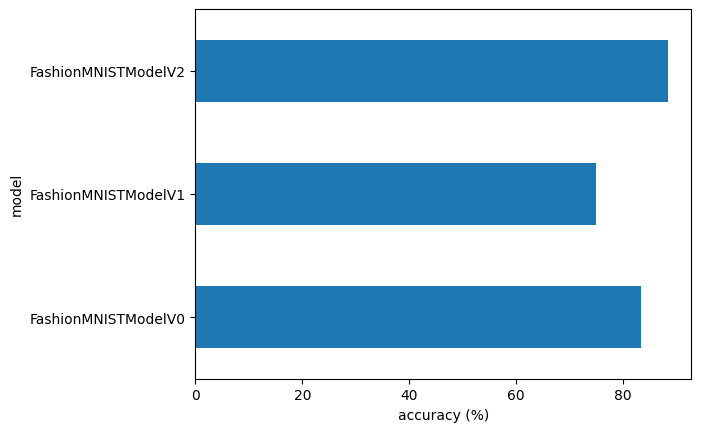

In [47]:
# 可视化模型结果
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. 使用最佳模型进行随机预测并评估

好的，我们已经比较了各个模型，现在让我们进一步评估表现最好的模型——`model_2`。

为此，我们将创建一个函数 `make_predictions()`，通过该函数我们可以将模型和一些数据传递给它，进行预测并评估结果。

In [48]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []  # 用于存储预测概率的列表
    model.eval()  # 设置模型为评估模式
    with torch.inference_mode():  # 在推理模式下进行
        for sample in data:
            # 准备样本
            sample = torch.unsqueeze(sample, dim=0).to(device)  # 增加一个维度并将样本移至设备

            # 前向传播（模型输出原始的logit值）
            pred_logit = model(sample)

            # 获取预测概率（logit -> 预测概率）
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)  # 注意：在"logits"维度上执行softmax，而不是"batch"维度（在这种情况下，我们的批次大小为1，所以可以在dim=0上执行）

            # 将预测概率从GPU移到CPU，以便进行进一步计算
            pred_probs.append(pred_prob.cpu())
            
    # 将pred_probs堆叠成一个张量
    return torch.stack(pred_probs)

In [49]:
import random
random.seed(42)  # 设置随机种子，以确保结果的可重复性
test_samples = []  # 用于存储测试样本的列表
test_labels = []  # 用于存储测试标签的列表

# 从测试数据中随机选择9个样本和标签
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)  # 将样本添加到test_samples列表
    test_labels.append(label)  # 将标签添加到test_labels列表

# 查看第一个测试样本的形状和标签
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [50]:
# 使用模型2对测试样本进行预测
pred_probs = make_predictions(model=model_2, 
                               data=test_samples)

# 查看前两个预测概率
pred_probs[:2]

tensor([[1.7481e-07, 3.8546e-08, 3.4990e-08, 4.4058e-07, 5.8387e-08, 9.9992e-01,
         4.7140e-07, 6.9302e-06, 8.9296e-06, 6.6301e-05],
        [2.7520e-02, 7.7324e-01, 8.0704e-04, 7.8342e-02, 4.7009e-02, 2.9832e-04,
         7.0979e-02, 3.3779e-04, 6.4120e-04, 8.2822e-04]])

现在我们可以使用 `make_predictions()` 函数对 `test_samples` 进行预测。

In [51]:
# 使用 model_2 对测试样本进行预测
pred_probs = make_predictions(model=model_2, 
                               data=test_samples)

# 查看前两个预测概率列表
pred_probs[:2]

tensor([[1.7481e-07, 3.8546e-08, 3.4990e-08, 4.4058e-07, 5.8387e-08, 9.9992e-01,
         4.7140e-07, 6.9302e-06, 8.9296e-06, 6.6301e-05],
        [2.7520e-02, 7.7324e-01, 8.0704e-04, 7.8342e-02, 4.7009e-02, 2.9832e-04,
         7.0979e-02, 3.3779e-04, 6.4120e-04, 8.2822e-04]])

很好!

现在我们可以通过对 `torch.softmax()` 激活函数的输出使用 `torch.argmax()` 来从预测概率转换为预测标签。

In [52]:
# 通过对预测概率使用 argmax() 将其转换为预测标签
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [53]:
# 我们的预测结果与测试标签的形式相同吗？
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Now our predicted classes are in the same format as our test labels, we can compare.

Since we're dealing with image data, let's stay true to the data explorer's motto. 

"Visualize, visualize, visualize!"

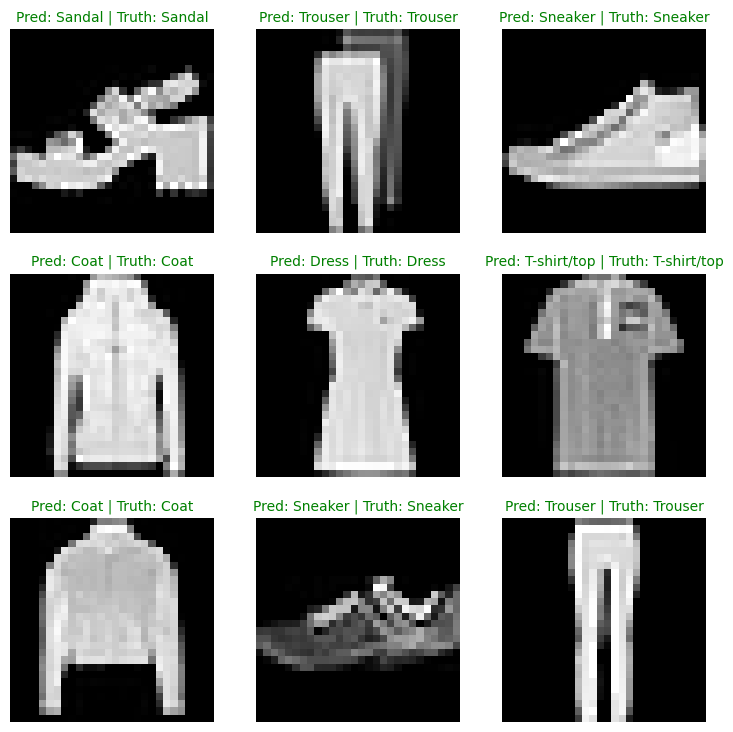

In [54]:
# 绘制预测结果
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # 创建一个子图
  plt.subplot(nrows, ncols, i+1)

  # 绘制目标图像
  plt.imshow(sample.squeeze(), cmap="gray")

  # 找到预测标签（文本形式，例如 "Sandal"）
  pred_label = class_names[pred_classes[i]]

  # 获取真实标签（文本形式，例如 "T-shirt"）
  truth_label = class_names[test_labels[i]] 

  # 创建图表标题文本
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # 检查预测结果是否与真实标签相等，并根据结果改变标题颜色
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # 如果正确，标题文字为绿色
  else:
      plt.title(title_text, fontsize=10, c="r") # 如果错误，标题文字为红色
  plt.axis(False);

看起来不错！

这几行 PyTorch 代码效果还挺好！

## 10. 制作混淆矩阵以进一步评估预测结果

在分类问题中，我们可以使用许多不同的[评估指标](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics)。

其中一个最直观的指标是[混淆矩阵](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)。

混淆矩阵能够显示出分类模型在预测和真实标签之间的混淆情况。

为了制作混淆矩阵，我们将经过三个步骤：
1. 使用训练好的模型 `model_2` 进行预测（混淆矩阵比较预测结果和真实标签）。
2. 使用 [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix) 生成混淆矩阵。
3. 使用 [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) 绘制混淆矩阵。

让我们先开始使用训练好的模型进行预测。

In [55]:
# 导入 tqdm 用于显示进度条
from tqdm.auto import tqdm

# 1. 使用训练好的模型进行预测
y_preds = []
model_2.eval()  # 设置模型为评估模式
with torch.inference_mode():  # 关闭梯度计算，提高推理效率
  for X, y in tqdm(test_dataloader, desc="Making predictions"):  # 遍历测试数据集
    # 将数据和标签发送到目标设备
    X, y = X.to(device), y.to(device)
    # 进行前向传播
    y_logit = model_2(X)
    # 将预测从 logits 转换为预测概率，再从概率转换为预测标签
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)  # 注意：在 "logits" 维度（dim=1）上执行 softmax，而不是在 "batch" 维度（dim=0）上
    # 将预测结果移到 CPU 上以便进一步评估
    y_preds.append(y_pred.cpu())

# 将预测结果列表拼接成一个张量
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 317.29it/s]


现在我们已经有了预测结果，让我们继续进行步骤 2 和 3：

2. 使用 [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix) 创建混淆矩阵。
3. 使用 [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) 绘制混淆矩阵。

首先，我们需要确保已经安装了 `torchmetrics` 和 `mlxtend`（这两个库将帮助我们创建和可视化混淆矩阵）。

> **注意：** 如果你使用的是 Google Colab，默认安装的 `mlxtend` 版本是 0.14.0（截至 2022 年 3 月），但为了使用我们需要的 `plot_confusion_matrix()` 函数的参数，我们需要 0.19.0 或更高版本。

In [57]:
# 检查是否安装了 torchmetrics 和 mlxtend，如果没有，则安装它们
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend 版本应该是 0.19.0 或更高"
except:
    !pip install -q torchmetrics -U mlxtend # <- 注意：如果你使用的是 Google Colab，可能需要重新启动运行时
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.2


To plot the confusion matrix, we need to make sure we've got and [`mlxtend`](http://rasbt.github.io/mlxtend/) version of 0.19.0 or higher.

In [58]:
#导入升级版的 mlxtend
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.2


`torchmetrics` 和 `mlxtend` 已安装，现在我们来创建一个混淆矩阵！

首先，我们创建一个 `torchmetrics.ConfusionMatrix` 实例，通过设置 `num_classes=len(class_names)` 来告知它我们处理的是多少个类别。

然后，我们通过将模型的预测 (`preds=y_pred_tensor`) 和真实标签 (`target=test_data.targets`) 传递给实例来创建混淆矩阵（以张量格式）。

最后，我们可以使用 `mlxtend.plotting` 中的 `plot_confusion_matrix()` 函数来绘制我们的混淆矩阵。


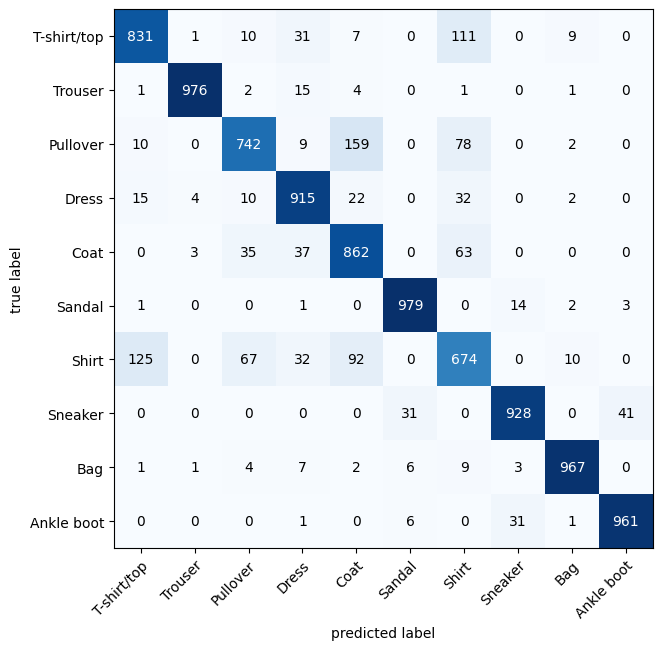

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. 设置混淆矩阵实例，并将预测与真实标签进行比较
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. 绘制混淆矩阵
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib 喜欢使用 NumPy 数据
    class_names=class_names, # 将行列标签转换为类别名称
    figsize=(10, 7)
)

看起来不错吧？

我们可以看到模型的表现相当不错，因为大多数深色的方块都集中在从左上到右下的对角线位置（理想的模型应该只有这些方块有值，其他地方为0）。

模型最常“混淆”的是相似类别，例如将“Pullover”预测为实际标签为“Shirt”的图像。

同样，模型将“Shirt”预测为实际标签为“T-shirt/top”的图像也比较常见。

这种信息通常比单一的准确率指标更有价值，因为它告诉我们模型出错的**位置**。

它还暗示了模型可能出错的**原因**。

可以理解的是，模型有时会将“Shirt”预测为标签为“T-shirt/top”的图像。

我们可以利用这些信息进一步检查模型和数据，看看如何进行改进。

> **练习：** 使用训练好的 `model_2` 对测试集 FashionMNIST 数据集进行预测。然后，绘制一些模型预测错误的样本，并显示图像的正确标签。在可视化这些预测后，你认为这是模型的错误还是数据的问题？也就是说，模型能做得更好吗，还是数据的标签之间差异太小（例如，“Shirt”标签与“T-shirt/top”标签太接近）？

## 11. 保存和加载最佳表现模型

让我们通过保存和加载我们表现最好的模型来完成这一部分内容。

回想一下 [notebook 01](./01_pytorch_workflow.ipynb) 中的内容，我们可以通过以下几种方法保存和加载 PyTorch 模型：

* `torch.save` - 一个函数，用于保存整个 PyTorch 模型或模型的 `state_dict()`。
* `torch.load` - 一个函数，用于加载保存的 PyTorch 对象。
* `torch.nn.Module.load_state_dict()` - 一个函数，用于将保存的 `state_dict()` 加载到现有的模型实例中。

你可以在 [PyTorch 保存和加载模型的文档](https://pytorch.org/tutorials/beginner/saving_loading_models.html) 中查看更多内容。

现在，让我们保存 `model_2` 的 `state_dict()`，然后将其加载回模型中并进行评估，以确保保存和加载过程正确无误。

In [60]:
from pathlib import Path

# 创建模型目录（如果目录不存在的话），参见：https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # 如果需要，创建父目录
                 exist_ok=True # 如果模型目录已存在，则不报错
)

# 创建模型保存路径
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 保存模型的 state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # 仅保存 state_dict()，只保存学习到的参数
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


现在我们已经保存了模型的 `state_dict()`，我们可以使用 `load_state_dict()` 和 `torch.load()` 将其加载回来。

由于我们使用的是 `load_state_dict()`，因此我们需要使用与保存的模型 `state_dict()` 相同的输入参数来创建一个新的 `FashionMNISTModelV2()` 实例。

In [61]:
# 创建一个新的 FashionMNISTModelV2 实例（与我们保存的 state_dict() 所用的类相同）
# 注意：如果这里的形状与保存的版本不一致，加载模型会报错
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # 可以尝试将其改为 128，看看会发生什么
                                    output_shape=10) 

# 加载保存的 state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# 将模型发送到 GPU
loaded_model_2 = loaded_model_2.to(device)

/var/folders/_2/rnny0md942g8pkfqbsh4qgrm0000gn/T/ipykernel_39692/3047080402.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=M

现在我们已经加载了模型，可以使用 `eval_model()` 对其进行评估，以确保它的参数与保存之前的 `model_2` 表现类似。

In [62]:
# 评估加载的模型
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3169020414352417,
 'model_acc': 88.36861022364218}

这些结果与 `model_2_results` 一样吗？

In [63]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3169020414352417,
 'model_acc': 88.36861022364218}

我们可以使用 `torch.isclose()` 来检查两个张量是否接近，并通过 `atol`（绝对容忍度）和 `rtol`（相对容忍度）参数来设置接近的容忍度。

如果我们的模型结果接近，`torch.isclose()` 的输出应该为 `True`。

In [64]:
# 检查结果是否接近（如果差距很大，可能存在错误）
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # 绝对容忍度
              rtol=0.0001) # 相对容忍度

tensor(True)

## 练习 

所有练习都旨在帮助你练习上述各部分的代码。

你应该能够通过参考每一部分或查看相关资源来完成它们。

所有练习应使用[与设备无关的代码](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code)完成。

**资源：**
* [03练习模板笔记本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [03例子解决方案笔记本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb)（在查看之前尝试完成练习）

1. 当前计算机视觉在行业中使用的三个领域是什么？
2. 搜索“机器学习中的过拟合是什么”，并写下一句你找到的内容。
3. 搜索“如何防止机器学习中的过拟合”，写下你找到的三种方法，并简要说明每种方法。**注意：**有很多方法，所以不用担心太多，选三种开始。
4. 花20分钟阅读并浏览[CNN Explainer网站](https://poloclub.github.io/cnn-explainer/)。
    * 使用“上传”按钮上传自己的示例图像，看看图像通过CNN的每一层时发生了什么。
5. 加载[`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST)训练和测试数据集。
6. 可视化至少5个不同的MNIST训练数据集样本。
7. 使用`torch.utils.data.DataLoader`将MNIST训练和测试数据集转换为数据加载器，设置`batch_size=32`。
8. 重新创建本笔记本中使用的`model_2`（来自[CNN Explainer网站](https://poloclub.github.io/cnn-explainer/)的相同模型，也称为TinyVGG），使其能够适应MNIST数据集。
9. 在CPU和GPU上训练你在练习8中创建的模型，并查看每种情况下的训练时间。
10. 使用你训练的模型进行预测，并可视化至少5个预测结果，将预测与目标标签进行比较。
11. 绘制混淆矩阵，将模型的预测与真实标签进行比较。
12. 创建一个形状为`[1, 3, 64, 64]`的随机张量，并通过`nn.Conv2d()`层进行前向传播，使用各种超参数设置（你可以选择任何设置）。当`kernel_size`参数增大或减小时，你注意到什么？
13. 使用与本笔记本中训练的`model_2`相似的模型对测试[`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html)数据集进行预测。
    * 然后绘制一些错误预测的图像，并显示图像的正确标签。
    * 在可视化这些预测后，你认为问题更可能是模型错误还是数据错误？
    * 即，模型是否可以做得更好，还是数据的标签过于相似（例如，“Shirt”标签与“T-shirt/top”标签太接近）？

## 额外内容
* **观看：**[MIT深度计算机视觉导论](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3)讲座。这将帮助你更好地理解卷积神经网络。
* 花10分钟浏览[PyTorch视觉库](https://pytorch.org/vision/stable/index.html)的不同选项，了解有哪些模块可用。
* 查找“最常见的卷积神经网络”，你找到了哪些架构？这些架构中有些包含在[`torchvision.models`](https://pytorch.org/vision/stable/models.html)库中吗？你认为可以用这些做些什么？
* 如果你想要大量预训练的PyTorch计算机视觉模型以及许多PyTorch计算机视觉功能的扩展，请查看[Ross Wightman的PyTorch图像模型库`timm`](https://github.com/rwightman/pytorch-image-models/)（Torch Image Models）。